# Projet Data Analyst

## Dans ce projet on va analyser les données de vente d'une société de smartphones et gadgets.

## Les questions métiers :

1. Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire ?
2. Dans quelle ville nous avons enregistré un maximum de commandes ?
3. En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes ?
4. Quel produit se vend le plus ?
5. Quelles sont les combinaisons de produits qui se vendent le plus ?

# Découverte des données

In [1]:
# importer les packages

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# collecter les noms des fichiers (datasets)

files = [file for file in os.listdir(r"C:\Users\noure\Desktop\Projet Data Analyst pour analyser les ventes de l'entreprise\Sales_Data")]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
# le chemin de nos données
path = "C:/Users/noure/Desktop/Projet Data Analyst pour analyser les ventes de l'entreprise/Sales_Data"

# créer une base de données vide
all_data = pd.DataFrame()

# alimenter la base de données
for file in files :
    current_data = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_data])
    
# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
# voir le nombre de lignes et le nombre de colonnes
all_data.shape

(186850, 6)

In [13]:
# mettre ces données dans un seul fichier csv
all_data.to_csv("Dataset_Final.csv", index=False)

In [15]:
# voir les types de mes données
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
# le nombre de valeurs manquantes pour chaque colonne
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [20]:
# X = (545/186850) * 100 = 0.29%
# comme les valeurs manquantes represente juste 0.29% de ma base de données donc je vais les supprimer
all_data = all_data.dropna(how="all")

# voir le nombre des lignes et des colonnes
all_data.shape

(186305, 6)

# Réponses aux questions métiers

## 1. Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire ?

In [25]:
# Extraire le mois depuis la colonne [Order Date]

# Définir la fonction month pour extraire le mois
def month(x):
    return x.split('/')[0]

# appliquer la fonction sur le dataset
all_data['Month'] = all_data['Order Date'].apply(month)

# afficher la base de données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
# Vérifier les valeurs de la nouvelle colonne [Month]
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [28]:
# Supprimer la valeur 'Order Date' depuis la colonne [Month]
all_data=all_data[all_data['Month']!='Order Date']

# Vérifier les valeurs de la nouvelle colonne [Month]
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [29]:
# vérifier les data types pour les colonnes
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [34]:
# changer le type pour la colonne [Month] to INT
all_data['Month']=all_data['Month'].astype(int)

# changer le type pour la colonne [Price Each] to FLOAT
all_data['Price Each']=all_data['Price Each'].astype(float)

# changer le type pour la colonne [Quantity Ordered] to INT
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

# changer le type pour la colonne [Order ID] to INT
all_data['Order ID']=all_data['Order ID'].astype(int)

# vérifier les data types pour les colonnes
all_data.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [35]:
# créer une nouvelle colonne [Sales] pour calculer le chiffre d'affaire pour chaque commande
all_data['Sales'] = all_data['Price Each']*all_data['Quantity Ordered']

# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [36]:
# afficher le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

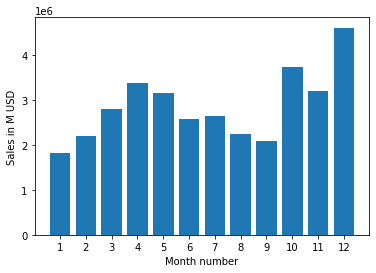

In [41]:
# visualisation
months = range(1,13)
plt.bar(months, all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in M USD')
plt.xlabel('Month number')
plt.show()

### Le mois Décembre c'est le mois durant lequel nous avaons réalisé le meilleur chiffre d'affaire

# 2. Dans quelle ville nous avons enregistré un maximum de commandes ?


In [42]:
# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [44]:
# Extraire la ville depuis la colonne [Purchase Address]

# Définir la fonction city pour extraire la ville
def city(x):
    return x.split(',')[1]

# appliquer la fonction sur le dataset
all_data['City'] = all_data['Purchase Address'].apply(city)

# afficher la base de données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


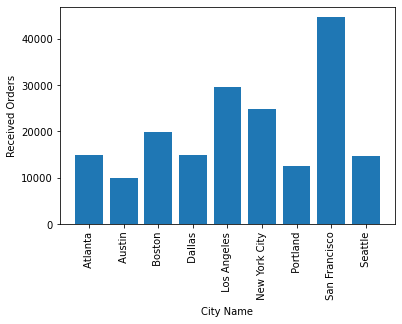

In [51]:
# afficher la ville avec un maximum de commandes
plt.bar(all_data.groupby('City')['City'].count().index, all_data.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received Orders')
plt.xlabel('City Name')
plt.show()

### San Francisco est la ville avec le maximum de commandes

# 3. En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes ?

In [52]:
# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [53]:
# Extraire l'heure depuis la colonne [Order Date]
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


Text(0, 0.5, 'nombre de commandes')

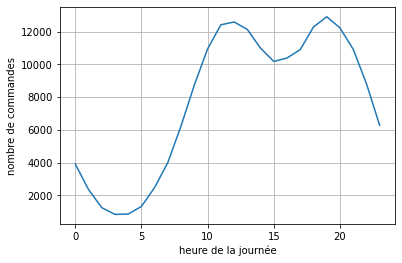

In [58]:
# afficher les moments pour faire la campagne publicitaire
keys=[]
hours=[]

for key, hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

plt.grid()
plt.plot(keys, hours)
plt.xlabel('heure de la journée')
plt.ylabel('nombre de commandes')

### Pour avoir un maximum de commande il faut lancer la compagne publicitaire entre 12h et 19h.

# 4. Quel produit se vend le plus ?

In [59]:
# afficher les données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


<AxesSubplot:xlabel='Product'>

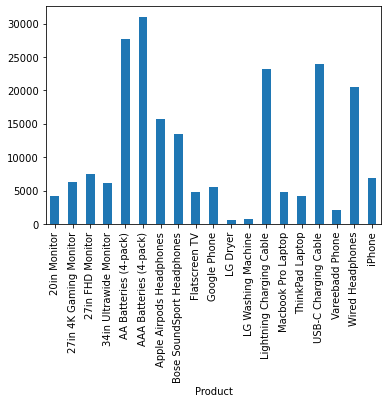

In [63]:
# afficher le produit qui se vend le plus
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

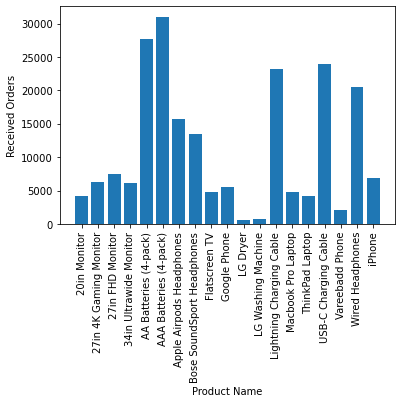

In [61]:
# afficher le produit qui se vend le plus
plt.bar(all_data.groupby('Product')['Quantity Ordered'].sum().index, all_data.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(rotation='vertical')
plt.ylabel('Received Orders')
plt.xlabel('Product Name')
plt.show()

### AAA Batteries, AA Batteries, USB-C Charging Cable sont des produits les plus vendus.

C:\Users\noure\AppData\Local\Temp\ipykernel_3500\1495497546.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

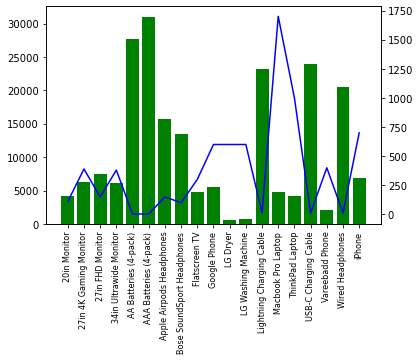

In [64]:
# on va faire une analyse pour savoir l'impact du prix sur le nombre de vente pour chaque produit
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

plt.figure(figsize=(40,24))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

### Ici, on peut obsérver que le prix influence le nombre de vente

# 5. Quelles sont les combinaisons de produits qui se vendent le plus ?

In [66]:
# Créer une base de données pour lister les produits vendu ensemble pour le meme Order ID 
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [69]:
# Créer une nouvelle colonne pour grouper les produits pour le meme Order ID
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# afficher les données
df.head()

C:\Users\noure\AppData\Local\Temp\ipykernel_3500\674983599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [71]:
# supprimer les duplicates
df = df.drop_duplicates(subset=['Order ID'])

# afficher les données
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


<AxesSubplot:>

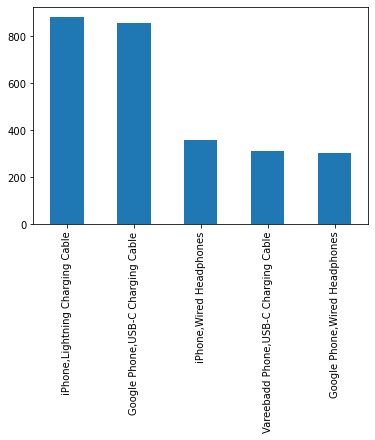

In [78]:
# afficher cinq combinaisons de produits qui se vendent le plus
df['Grouped'].value_counts()[0:5].plot(kind='bar')

# FIN